## What I Find
I use the groupby and mean filter to get the mean obesity per neighborhood. I then only print the bottom 3 so that I have a clear understanding of the best neighborhoods.

In [16]:
import pandas as pd
import geopandas
%matplotlib inline

In [17]:
# import dataset
cca = pd.read_csv("Obesity1.csv")
#### filter to important info
best = cca.groupby("neighborhood").mean()['obesity']
best.sort_values(ascending=True).head(10)

neighborhood
North Oakland          0.104579
North Shore            0.121487
Squirrel Hill North    0.125941
Name: obesity, dtype: float64

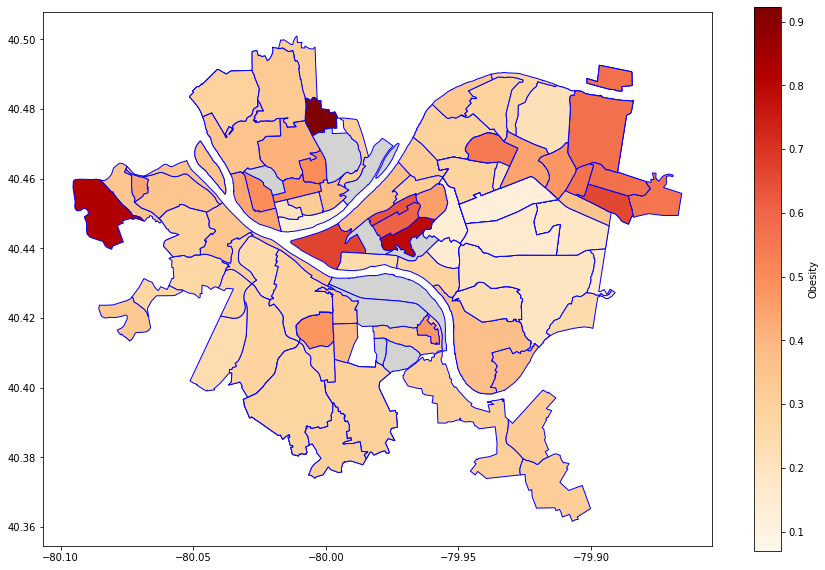

In [18]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
NBCT_map = neighborhoods.merge(cca, how='left', left_on='hood', right_on='neighborhood')
NBCT_map.plot(column='obesity', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="blue",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Obesity"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )